In [1]:
import pandas as pd
from yellowbrick.datasets import load_bikeshare

X, y = load_bikeshare()
print(X.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       1     0      1     0        0        6           0        1  0.24   
1       1     0      1     1        0        6           0        1  0.22   
2       1     0      1     2        0        6           0        1  0.22   
3       1     0      1     3        0        6           0        1  0.24   
4       1     0      1     4        0        6           0        1  0.24   

   feelslike  humidity  windspeed  
0     0.2879      0.81        0.0  
1     0.2727      0.80        0.0  
2     0.2727      0.80        0.0  
3     0.2879      0.75        0.0  
4     0.2879      0.75        0.0  


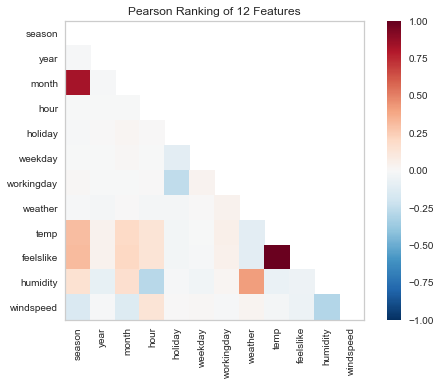

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [2]:
## Rank Features visualizer to compute Pearson correlations between all pairs of features as follows:

from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

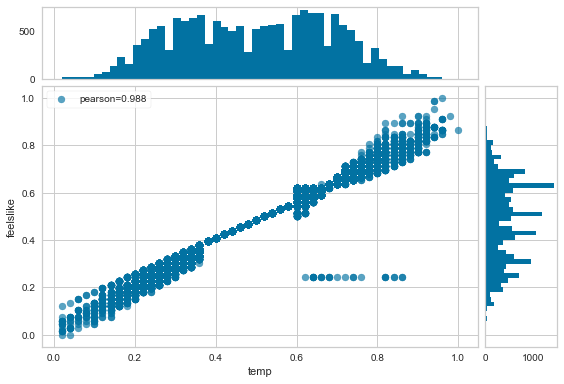

<AxesSubplot:xlabel='temp', ylabel='feelslike'>

In [3]:
## ## There is strong relationship between these two features
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp', 'feelslike'])
visualizer.fit_transform(X, y)
visualizer.show()

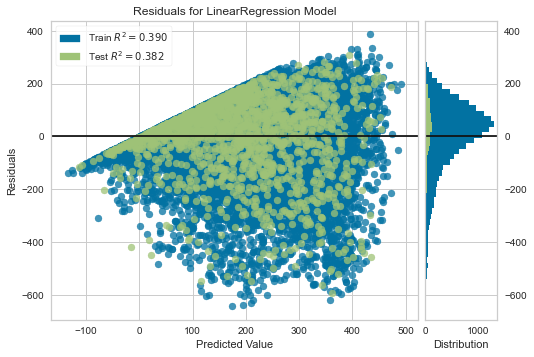

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [4]:
### For linear regression problem to plot the resuduals.

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

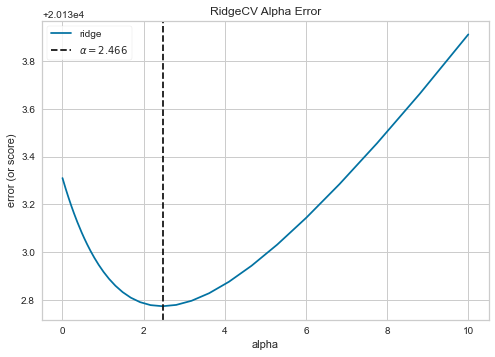

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [5]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show()

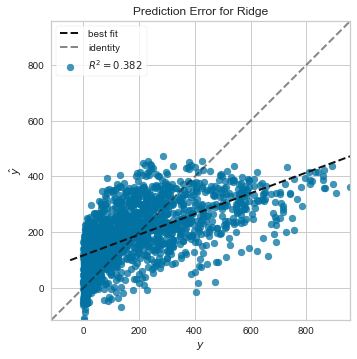

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [6]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()